Title of Project: Predicing Diabetes using Health Data

**Objective**:To predict whether a person has diabetes based on medical measurements such as blood pressure, BMI, and glucose levels using a logistic regression model.

**Data** **Source**:We will use the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. This dataset contains health data for 768 individuals, including features like age, BMI, blood pressure, and glucose levels.

**Import** **Libraries**

Import Data:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import Data:

In [3]:
# Load the Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# Columns based on the dataset documentation
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

Describe Data:

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Show summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

Data Visualization:

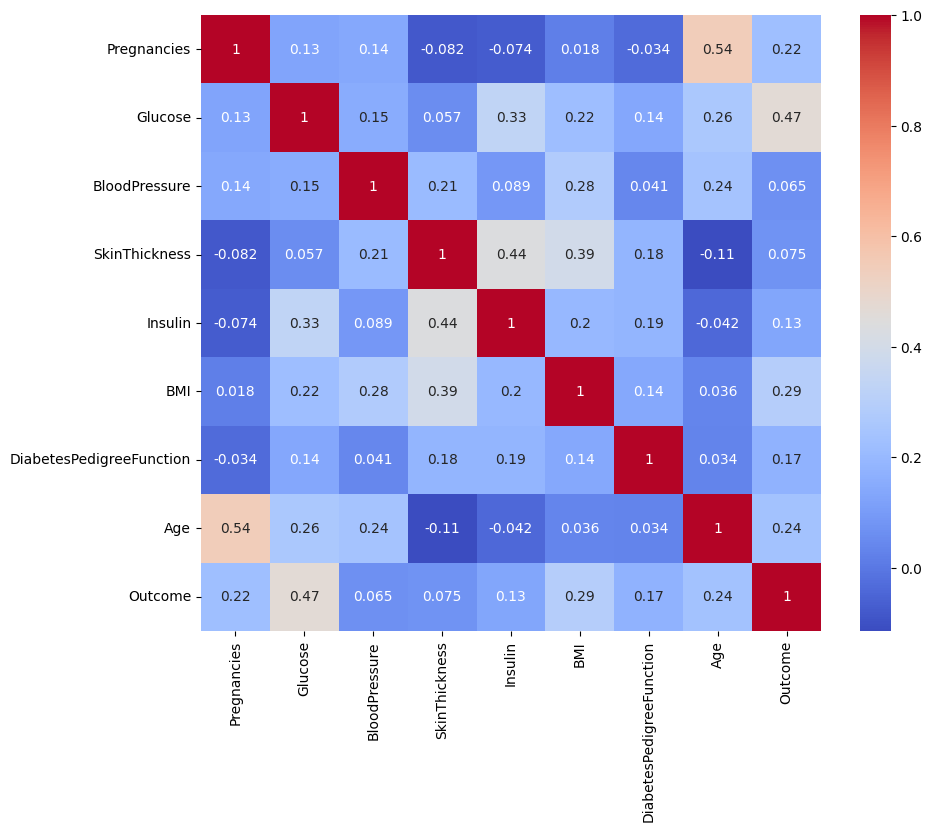

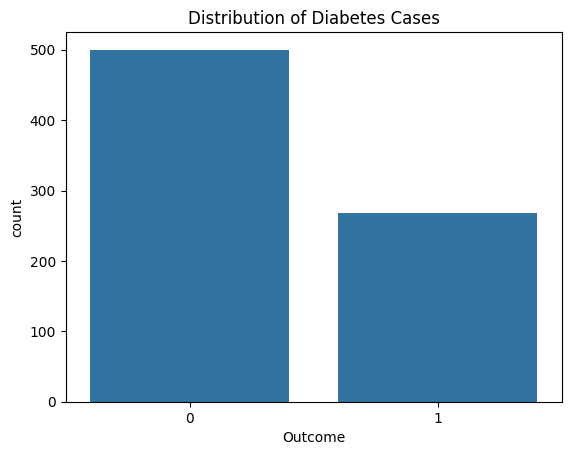

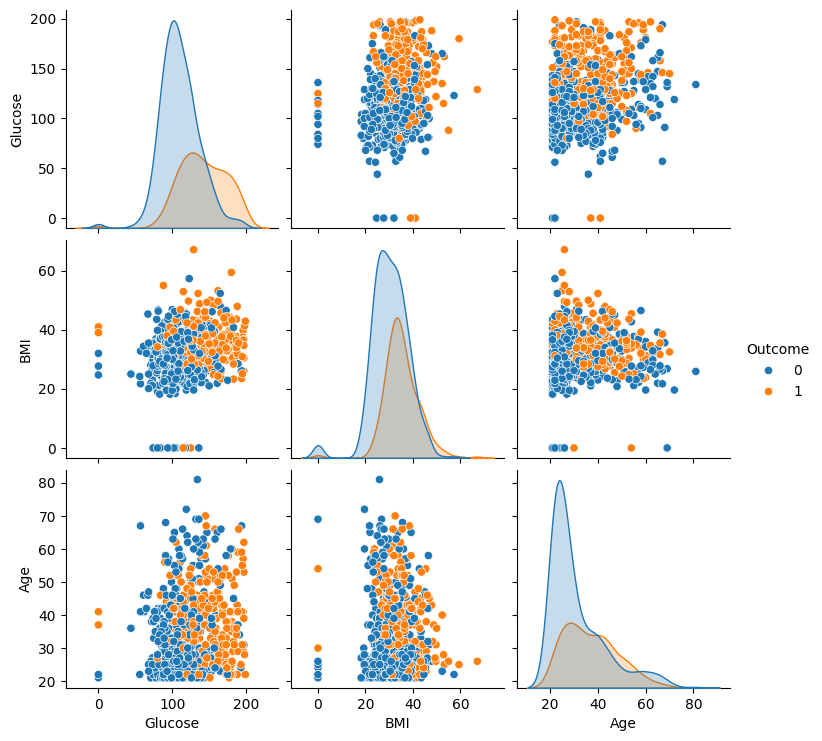

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of Outcome (Diabetes: 1, No Diabetes: 0)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Cases')
plt.show()

# Plot relationships between some features and outcome
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

Data Preprocessing:We’ll check if any missing or zero values exist in features where they shouldn’t (like Glucose, BMI).

In [6]:
# Replace 0s in features where they don't make sense with NaN, then fill with the mean
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# Check if replacement was successful
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Define Target Variable (y) and Feature Variables (X):

In [7]:
# Define the feature matrix (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features (all except Outcome)
y = df['Outcome']  # Target variable (Outcome: 1 for diabetes, 0 for no diabetes)

Train Test Split:

In [8]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling:

In [9]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Model Evaluation:

Model Accuracy: 75.32%


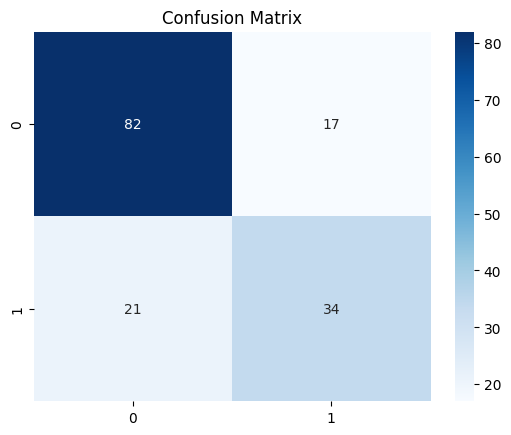

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

Prediction:

In [20]:
# Predict diabetes for a new individual with health data
new_data = [[5, 120, 72, 35, 0, 33.6, 0.627, 50]]  # Example health metrics
predicted_outcome = model.predict(new_data)
if predicted_outcome[0] == 1:
    print("The model predicts that this person has diabetes.")






The model predicts that this person has diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Explanation**:
**Objective**: The goal was to predict whether an individual has diabetes based on health data.

**Data** **Visualization**: We used a heatmap and pair plots to understand the relationships between features and the target outcome.

**Data** **Preprocessing**: We replaced 0 values in columns where they don’t make sense (like BMI and glucose levels) with the mean of the column.

**Modeling**: A logistic regression model was trained to classify individuals as diabetic or non-diabetic.

Evaluation: The model’s accuracy, confusion matrix, and classification report showed how well the model **performed**.

**Prediction**: We used the trained model to predict the diabetes status of a new individual based on their health data.